In [5]:
import networkx as nx
import matplotlib.pyplot as plt


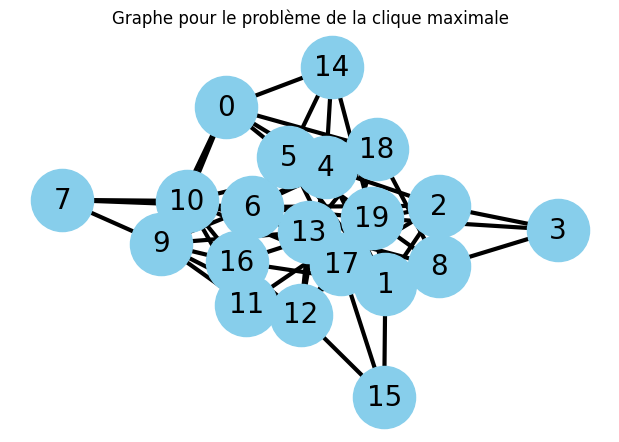

In [10]:
# Création d'un graphe
G = nx.erdos_renyi_graph(20, 0.3)

plt.figure(figsize=(6,4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=20, width=3)
plt.title("Graphe pour le problème de la clique maximale")
plt.show()

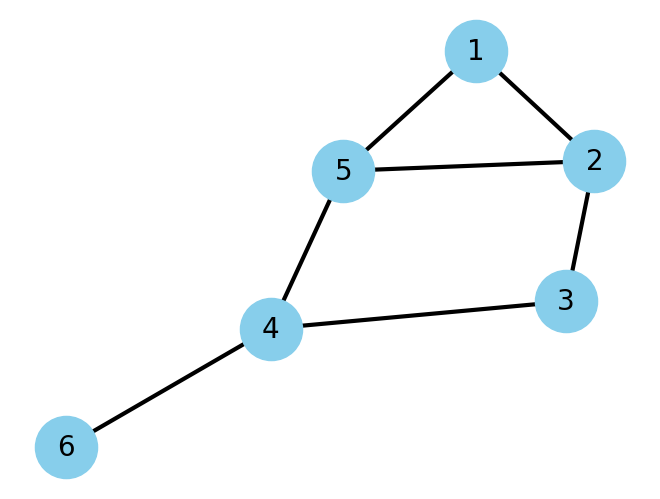

In [77]:
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6])
G2.add_edges_from([(1, 2), (1, 5), (5, 2), (4, 5), (3, 2), (4, 3), (4, 6)])
nx.draw(G2, with_labels=True, node_size=2000, node_color='skyblue', font_size=20, width=3)

### Algo naif
Simple/naïf
```
fonction recherche_clique(graphe G):
    n = nombre de sommets de G
    taille_max_clique = 0
    clique_max = ensemble vide
    
    pour chaque sous-ensemble S de sommets de G:
        si la taille de S > taille_max_clique et est_clique(G, S):
            taille_max_clique = taille de S
            clique_max = S
            
    retourner clique_max
```



In [11]:
for s in G:
    print(s)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [63]:
def is_clique(graph, set_):
    edges = graph.edges
    for n1 in set_:
        for n2 in set_:
            if (n1 == n2):
                continue
            if ((n1, n2) not in edges and (n2, n1) not in edges):
                return False

    return True


In [82]:
def recherche_clique(graphe):
    n = graphe.order()
    size_max = 0
    clique_max = None
    neighbor_subgraphs = {}

    for node in graphe:
        S = set(graphe.neighbors(node))
        S.add(node)

        if len(S) > size_max and is_clique(graphe, S):
            size_max = len(S)
            clique_max = S

    return clique_max
    


clique = recherche_clique(G2)
print(clique)

print(list(nx.find_cliques(G2)))

{1, 2, 5}
[[2, 1, 5], [2, 3], [4, 3], [4, 5], [4, 6]]
